In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [6]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]
       

In [7]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [8]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [9]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

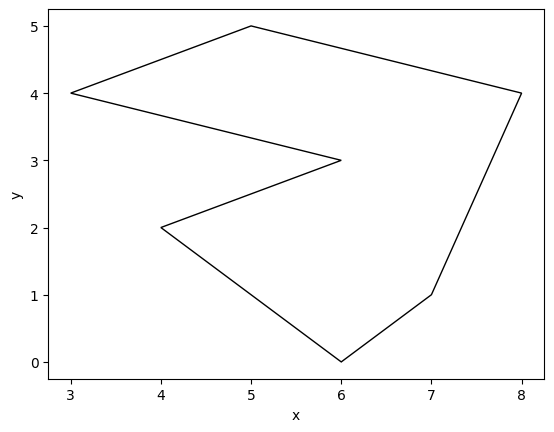

In [10]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

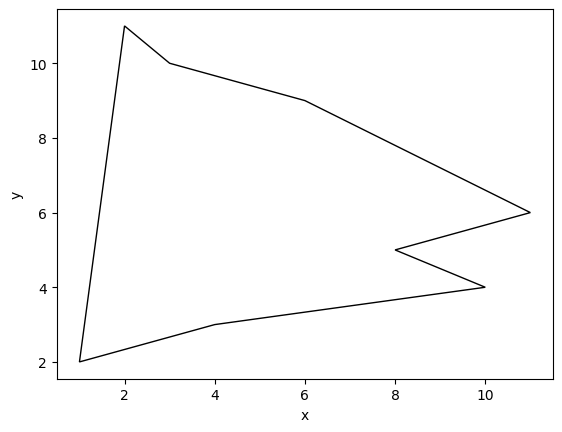

In [11]:
polygon = [(1,2),(4,3),(10,4),(8,5),(11,6),(6,9),(3,10),(2,11)]
draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [12]:


def index_max_y(points):
    max_y = float('-inf')
    index = -1
    for i in range(len(points)):
        if points[i][1] > max_y:
            max_y = points[i][1]
            index = i
    return index

def index_min_y(points):
    min_y = float('inf')
    index = -1
    for i in range(len(points)):
        if points[i][1] < min_y:
            min_y = points[i][1]
            index = i
    return index

def is_y_monotonic(polygon):
    n = len(polygon)
    max_y_index = index_max_y(polygon)
    min_y_index = index_min_y(polygon)
    
    previous_index = max_y_index    
    while previous_index != min_y_index:
        current_index = previous_index + 1
        if current_index == n:
            current_index = 0
        if polygon[previous_index][1] <= polygon[current_index][1]:
            return False
        previous_index = current_index
        
    previous_index = max_y_index 
    while previous_index != min_y_index:
        current_index = previous_index - 1
        if current_index == -1:
            current_index = n-1
        if polygon[previous_index][1] <= polygon[current_index][1]:
            return False
        previous_index = current_index
        
    return True

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji.

In [13]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [14]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

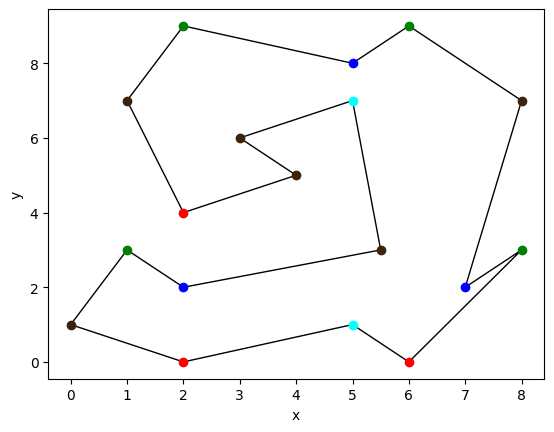

In [15]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [16]:
def mat_det_2x2(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    return (ax-cx)*(by-cy)-(bx-cx)*(ay-cy)


def index_max_y(points):
    max_y = float('-inf')
    index = -1
    for i in range(len(points)):
        if points[i][1] > max_y:
            max_y = points[i][1]
            index = i
    return index

def index_min_y(points):
    min_y = float('inf')
    index = -1
    for i in range(len(points)):
        if points[i][1] < min_y:
            min_y = points[i][1]
            index = i
    return index

def check_variant(befor,curr,after):
    if  curr[1]>after[1] and curr[1]>befor[1] and mat_det_2x2(befor,curr,after)>0:
        return 0
    elif  curr[1]<after[1] and curr[1]<befor[1] and mat_det_2x2(befor,curr,after)>0:
        return 1
    elif  curr[1]<after[1] and curr[1]<befor[1] and mat_det_2x2(befor,curr,after)<0:
        return 2
    elif  curr[1]>after[1] and curr[1]>befor[1] and mat_det_2x2(befor,curr,after)<0:
        return 3
    return 4

def color_vertex(polygon):
    n = len(polygon)
    poly_cat=[4 for _ in range(n)]
    
    poly_cat[0]=check_variant(polygon[n-1],polygon[0],polygon[1])
    poly_cat[n-1]=check_variant(polygon[n-2],polygon[n-1],polygon[0])
        
        
    
    for i in range(1,n-1):
        befor=polygon[i-1]
        curr=polygon[i]
        after=polygon[i+1]
        poly_cat[i]=check_variant(befor,curr,after)
        
    return poly_cat
    
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [17]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

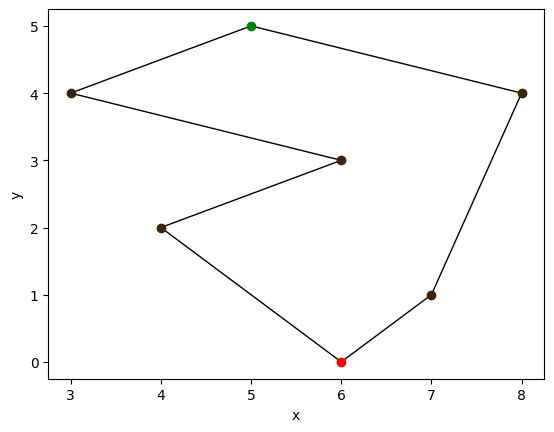

In [18]:
colors = color_vertex(polygon_example_1)
draw_polygon_colors(polygon_example_1,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

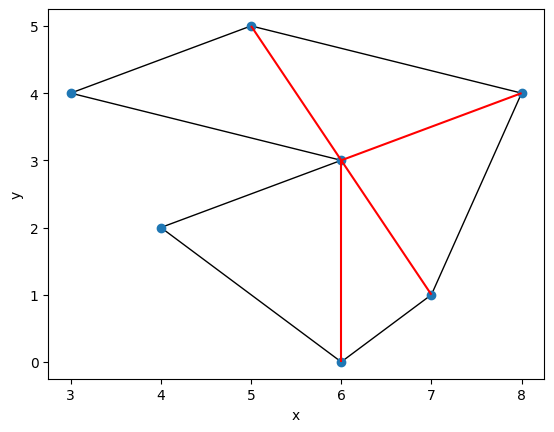

In [19]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [20]:
import copy

def inside_check(chain, a, b, c):
    if chain == 0:
        return mat_det_2x2(a, b, c) > 0
    else:
        return mat_det_2x2(a, b, c) < 0
    


def triangulation(polygon):

    if not is_y_monotonic(polygon):
        return False
    unmodified = copy.deepcopy(polygon)
    
    max_ind = index_max_y(polygon)
    min_ind = index_min_y(polygon)
    
    branched = []
    for i in range(len(polygon)):
        if min_ind < max_ind:
            if min_ind < i <= max_ind:
                branched.append((polygon[i], 1, i))
            else:
                branched.append((polygon[i], 0, i))
        else:
            if min_ind > i >= max_ind:
                branched.append((polygon[i], 0, i))
            else:
                branched.append((polygon[i], 1, i))

    branched = sorted(branched, key=lambda k: (k[0][1], k[0][0], k[1]), reverse=True)
    diagonals = []
    S = [branched[0], branched[1]]
    for i in range(2, len(polygon)):
        if S[-1][1] != branched[i][1]:
            while len(S):
                u = S.pop()
                if abs(u[2] - branched[i][2]) > 1:
                    diagonals.append((u[2], branched[i][2]))
            S.append(branched[i - 1])
            S.append(branched[i])
        else:
            u = S.pop()
            while len(S) > 0 and inside_check(branched[i][1], branched[i][0], S[-1][0], u[0]):
                if abs(S[-1][2] - branched[i][2]) > 1:
                    diagonals.append((S[-1][2], branched[i][2]))
                u = S.pop()
            S.append(u)
            S.append(branched[i])
    if (0, len(polygon) - 1) in diagonals:
        diagonals.remove((0, len(polygon) - 1))
    if (len(polygon) - 1, 0) in diagonals:
        diagonals.remove((len(polygon) - 1, 0))

    return diagonals



            
        
        
        
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [21]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

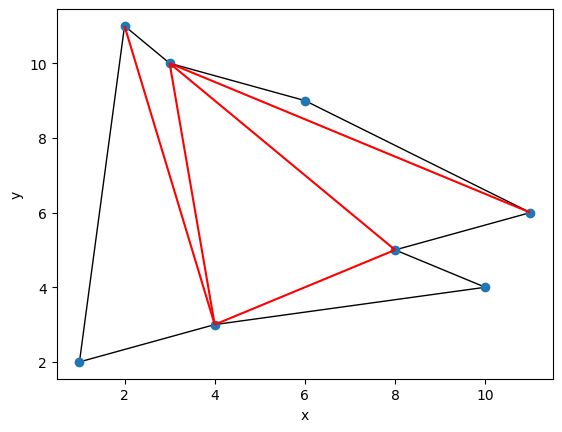

In [22]:
tri = triangulation(polygon)
tri_copy=[]
for p,k in tri:
    tri_copy.append((polygon[p],polygon[k]))
draw_polygon_tri(polygon,tri_copy)

In [23]:
def inside_check(chain, a, b, c):
    if chain == 0:
        return mat_det_2x2(a, b, c) > 0
    else:
        return mat_det_2x2(a, b, c) < 0
    


def triangulation_vis(polygon):
    vis = Visualizer()

    for i in range(len(polygon) - 1):
        vis.add_point(polygon[i], color="black")
        vis.add_line_segment((polygon[i], polygon[i + 1]), color="blue")

    vis.add_point(polygon[-1],color="black")
    vis.add_line_segment((polygon[-1], polygon[0]), color="blue")
    vis.show()

    if not is_y_monotonic(polygon):
        return False
    unmodified = copy.deepcopy(polygon)
    max_ind = index_max_y(polygon)
    min_ind = index_min_y(polygon)
    branched = []
    for i in range(len(polygon)):
        if min_ind < max_ind:
            if min_ind < i <= max_ind:
                branched.append((polygon[i], 1, i))
            else:
                branched.append((polygon[i], 0, i))
        else:
            if min_ind > i >= max_ind:
                branched.append((polygon[i], 0, i))
            else:
                branched.append((polygon[i], 1, i))
                

    branched = sorted(branched, key=lambda k: (k[0][1], k[0][0], k[1]), reverse=True)
    diagonals = []
    S = [branched[0], branched[1]]
    for i in range(2, len(polygon)):
        vis.add_point(branched[i][0],color="cyan")
        if S[-1][1] != branched[i][1]:
            while len(S):
                u = S.pop()
                vis.add_point(u[0],color="red")
                for j in range(len(S)):
                    vis.add_point(S[j][0],color="yellow")
                if abs(u[2] - branched[i][2]) > 1:
                    diagonals.append((u[2], branched[i][2]))
                    vis.add_line_segment((u[0], branched[i][0]), color="red")
                vis.show()
                for j in range(len(S)):
                    vis.add_point(S[j][0],color="black")
                vis.add_point(u[0],color="black")
            S.append(branched[i - 1])
            S.append(branched[i])
        else:
            u = S.pop()
            vis.add_point(u[0],color="red")
            while len(S) > 0 and inside_check(branched[i][1], branched[i][0], S[-1][0], u[0]):
                for j in range(len(S)):
                    vis.add_point(S[j][0],color="yellow")
                if abs(S[-1][2] - branched[i][2]) > 1:
                    diagonals.append((S[-1][2], branched[i][2]))
                    vis.add_line_segment((S[-1][0], branched[i][0]), color="red")
                vis.show()
                for j in range(len(S)):
                    vis.add_point(S[j][0],color="black")
                vis.add_point(u[0],color="black")
                u = S.pop()
                vis.show()
            
            S.append(u)
            S.append(branched[i])
            vis.add_point(branched[i][0],color="black")
            
    if (0, len(polygon) - 1) in diagonals:
        vis.add_line_segment((polygon[0], polygon[len(polygon) - 1]), color="blue")
        diagonals.remove((0, len(polygon) - 1))
    if (len(polygon) - 1, 0) in diagonals:
        vis.add_line_segment((polygon[len(polygon) - 1], polygon[0]), color="blue")
        diagonals.remove((len(polygon) - 1, 0))

    vis.show()
    return diagonals

In [24]:
pol=zczytaj("tablicowe.txt")
tri = triangulation_vis(pol)

NameError: name 'zczytaj' is not defined

In [25]:
def triangulation_struct(polygon):

    if not is_y_monotonic(polygon):
        return False
    unmodified = copy.deepcopy(polygon)
    
    max_ind = index_max_y(polygon)
    min_ind = index_min_y(polygon)
    
    branched = []
    diagonals=[]
    for i in range(len(polygon)-1):
        diagonals.append((i,i+1))
        
    diagonals.append((len(polygon)-1,0))
        
        
    for i in range(len(polygon)):
        if min_ind < max_ind:
            if min_ind < i <= max_ind:
                branched.append((polygon[i], 1, i))
            else:
                branched.append((polygon[i], 0, i))
        else:
            if min_ind > i >= max_ind:
                branched.append((polygon[i], 0, i))
            else:
                branched.append((polygon[i], 1, i))

    branched = sorted(branched, key=lambda k: (k[0][1], k[0][0], k[1]), reverse=True)
    
    S = [branched[0], branched[1]]
    for i in range(2, len(polygon)):
        if S[-1][1] != branched[i][1]:
            while len(S):
                u = S.pop()
                if abs(u[2] - branched[i][2]) > 1:
                    if not u[2] == len(polygon)-1 and branched[i][2]!=0:
                        diagonals.append((u[2], branched[i][2]))
            S.append(branched[i - 1])
            S.append(branched[i])
        else:
            u = S.pop()
            while len(S) > 0 and inside_check(branched[i][1], branched[i][0], S[-1][0], u[0]):
                if abs(S[-1][2] - branched[i][2]) > 1:
                    if not S[-1][2] ==len(polygon)-1 and branched[i][2]!=0:
                        diagonals.append((S[-1][2], branched[i][2]))
                u = S.pop()
            S.append(u)
            S.append(branched[i])

    struct=(polygon,diagonals)
    return struct


In [26]:
def generator_figur(n,name):
    %matplotlib tk
    klikniecia =0
    punkty = []
    def onclick(event):
        nonlocal klikniecia
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
            with open(name, 'a') as file:
                file.write(f'({x},{y})\n')
                klikniecia+=1
            punkty.append((x, y))
            ax.scatter(x, y, color='red')
            ax.set_xlim(0, 10)
            ax.set_ylim(0, 10)
            plt.draw()

    fig, ax = plt.subplots()
    ax.set_title('Kliknij na wykresie')

    cid = fig.canvas.mpl_connect('button_press_event', onclick)


    n= int(n)
    while klikniecia<n:
        plt.pause(0.1)
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        
    plt.close(fig)
    fig.canvas.mpl_disconnect(cid)
    

    %matplotlib inline

In [27]:
generator_figur(4,"kwadrat.txt")
print("Koniec")

Koniec


In [19]:
def zczytaj(name):
    with open(name, 'r') as file:
        lines = file.readlines()


    polygon=[]
    for line in lines:
        line = line.strip()
        line = line.replace('(', '')
        line = line.replace(')', '') 

        coordinates = line.split(',')
        x_coord = float(coordinates[0])
        y_coord = float(coordinates[1])
        print
        polygon.append((x_coord,y_coord))
        
    return polygon
        


In [20]:
pol=zczytaj("kwadrat.txt")
triangulation(pol)

[(3, 1)]

In [44]:
generator_figur(4,"kwadrat.txt")
print("Koniec")

[]


[(0.46370967741935487, 0.8555194805194806), (0.22379032258064516, 0.4956709956709957), (0.469758064516129, 0.1547619047619048), (0.719758064516129, 0.5227272727272727)]


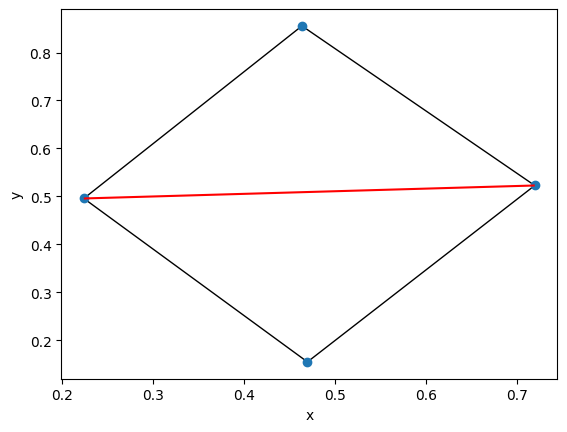

In [21]:
pol=zczytaj("kwadrat.txt")
print(pol)
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon_tri(pol,tri_copy)

In [76]:
generator_figur(7,"grzeb_lew.txt")
print("Koniec")

Koniec


In [81]:
generator_figur(7,"grzeb_praw.txt")
print("Koniec")

Koniec


In [82]:
generator_figur(8,"gwiazda.txt")
print("Koniec")

Koniec


In [83]:
generator_figur(7,"wcisniecie_lew.txt")
print("Koniec")

Koniec


In [84]:
generator_figur(7,"wcisiniecie_praw.txt")
print("Koniec")

Koniec


In [85]:
generator_figur(8,"wcisiniecie_obu.txt")
print("Koniec")

Koniec


In [94]:
generator_figur(14,"grzebdwustronny.txt")
print("Koniec")

Koniec


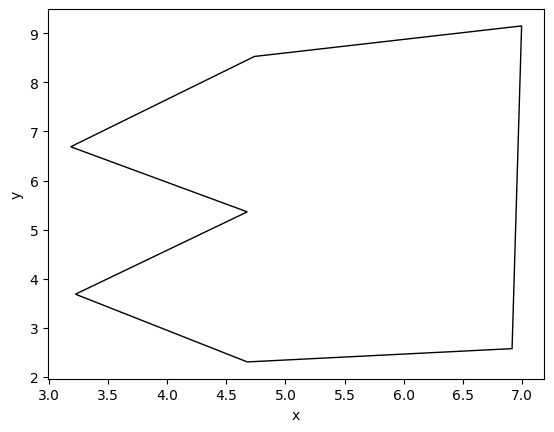

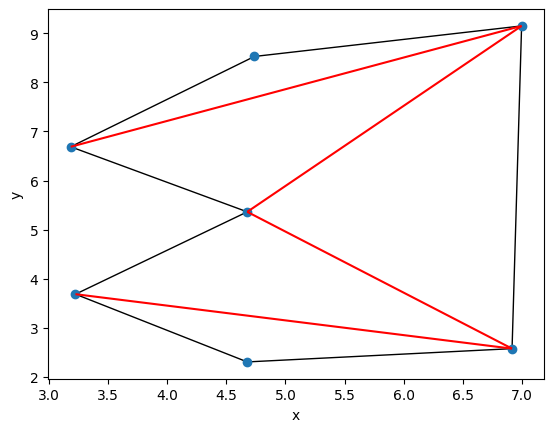

In [96]:
pol=zczytaj("grzeb_lew.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

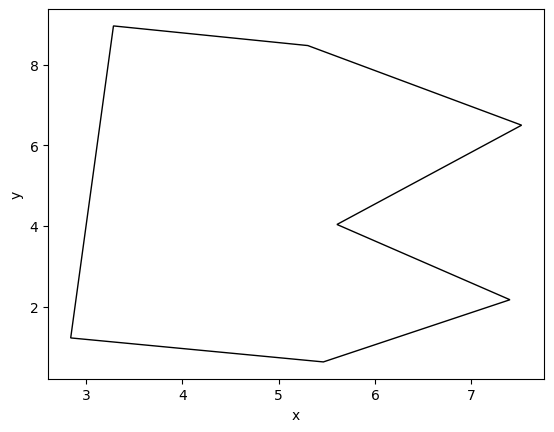

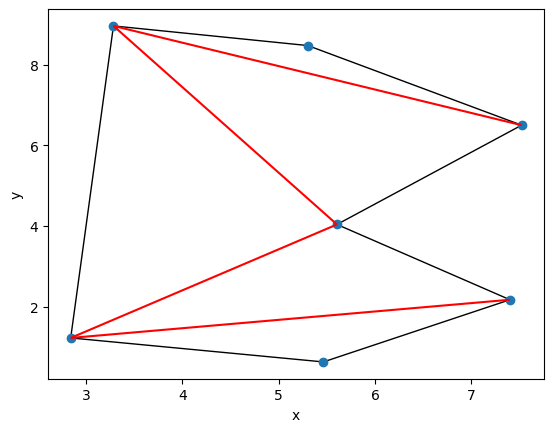

In [23]:
pol=zczytaj("grzeb_praw.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

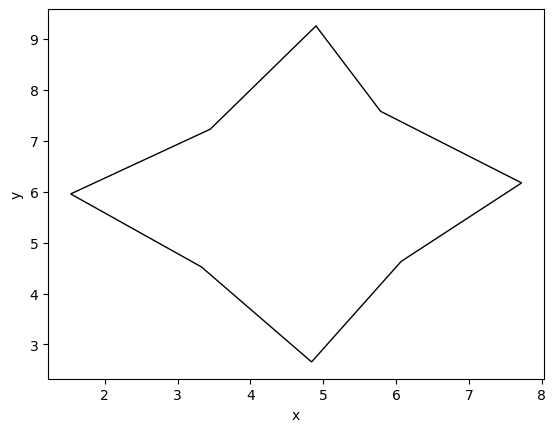

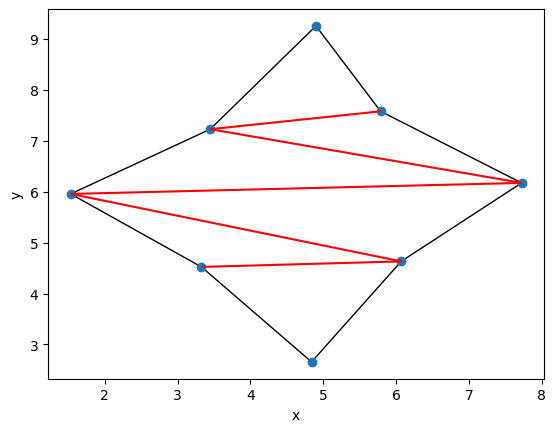

In [98]:
pol=zczytaj("gwiazda.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

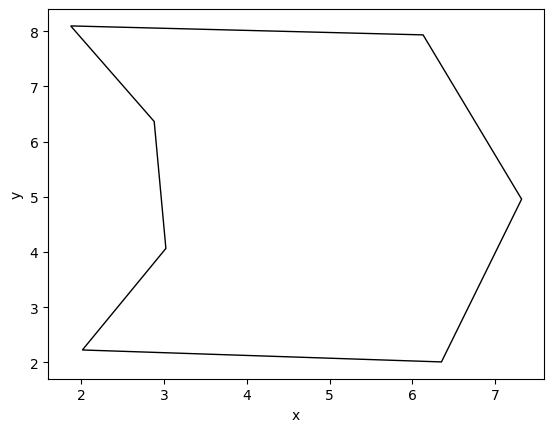

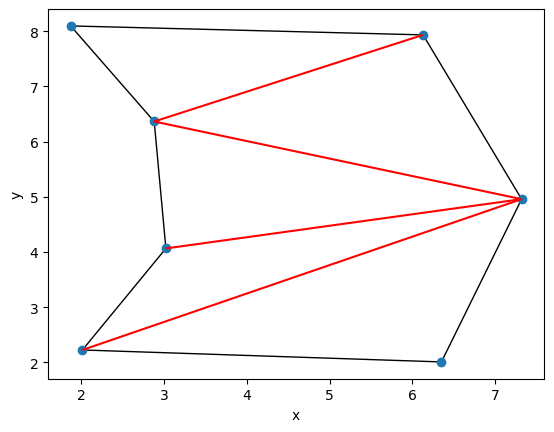

In [99]:
pol=zczytaj("wcisniecie_lew.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

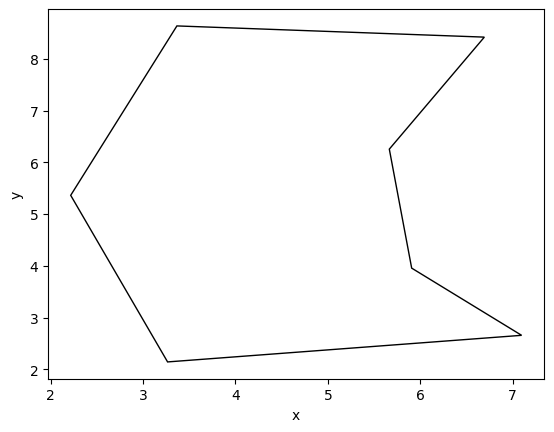

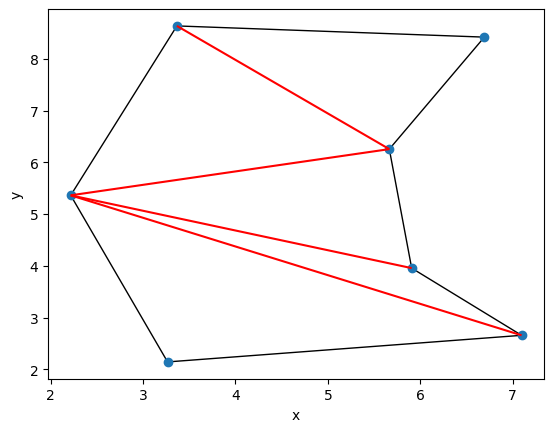

In [100]:
pol=zczytaj("wcisiniecie_praw.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

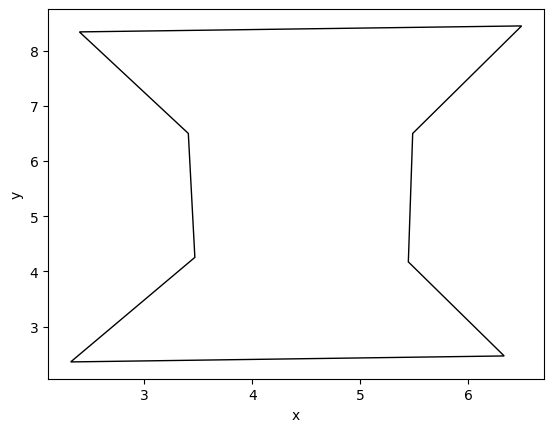

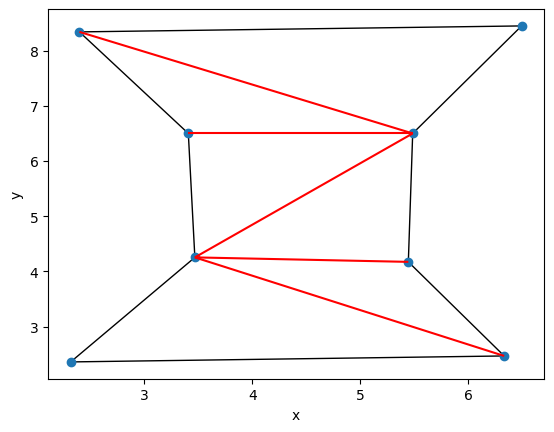

In [101]:
pol=zczytaj("wcisiniecie_obu.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

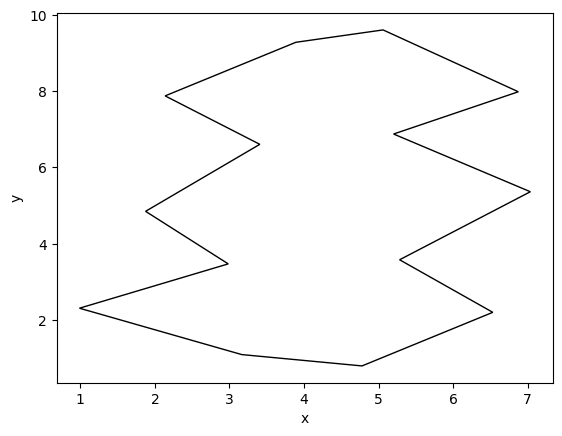

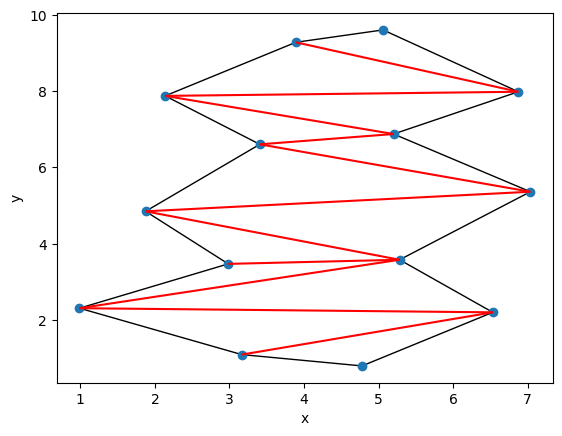

In [102]:
pol=zczytaj("grzebdwustronny.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

In [24]:
generator_figur(9,"tablicowe.txt")
print("Koniec")

Koniec


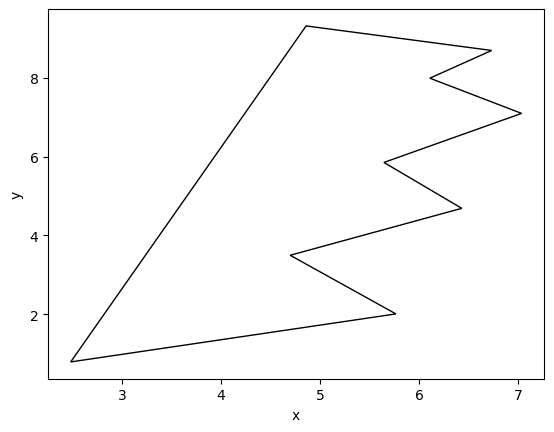

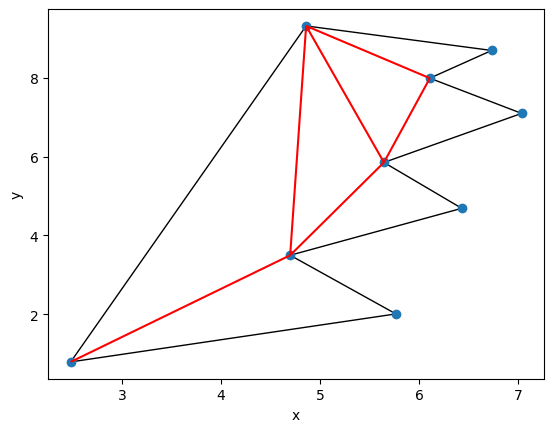

In [25]:
pol=zczytaj("tablicowe.txt")
tri = triangulation(pol)
tri_copy=[]
for p,k in tri:
    tri_copy.append((pol[p],pol[k]))
draw_polygon(pol)
draw_polygon_tri(pol,tri_copy)

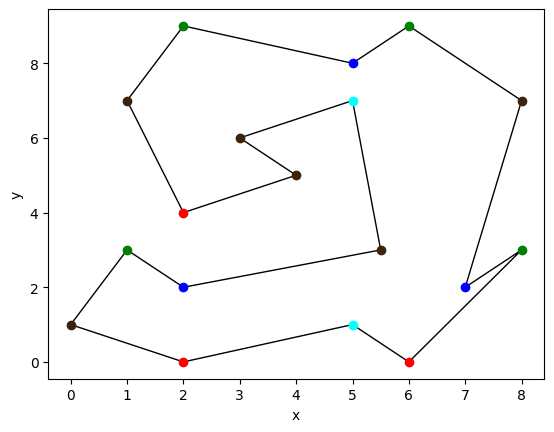

In [77]:
pol_color=color_vertex(polygon_example_2)
draw_polygon_colors(polygon_example_2,pol_color)

In [30]:
def generator_figur(n,name):
    %matplotlib tk
    klikniecia =0
    punkty = []
    def onclick(event):
        nonlocal klikniecia
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
            klikniecia+=1
            punkty.append((x, y))
            ax.scatter(x, y, color='red')
            ax.set_xlim(0, 10)
            ax.set_ylim(0, 10)
            plt.draw()

    fig, ax = plt.subplots()
    ax.set_title('Kliknij na wykresie')

    cid = fig.canvas.mpl_connect('button_press_event', onclick)


    n= int(n)
    while klikniecia<n:
        plt.pause(0.1)
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
            
    %matplotlib inline
    return punkty
    